<a href="https://colab.research.google.com/github/dmousa75/stqd6014-Data-Science/blob/main/Project2_iedited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Install Package

In [2]:
!pip install pandas emoji
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.2 MB/s eta 0:00:00


In [3]:
# Import NumPy, Pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Load the dataset 'tweet.csv'

In [5]:
file_path = ('/content/drive/MyDrive/Colab Notebooks/Project 2/tweets.csv')
df = pd.read_csv(file_path)

In [6]:
df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50001 non-null  object 
 1   Date        50001 non-null  object 
 2   User        50001 non-null  object 
 3   Tweet       50000 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


##Check All unique users from dataset

In [48]:
all_unique_users_count = df['User'].nunique()
print("Number of unique users:", all_unique_users_count)

Number of unique users: 35110


##Sampled the data to 40% of rows randomly

In [8]:
sampled_df = df.sample(frac=0.40, random_state=42)

In [9]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 33553 to 42327
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20000 non-null  object 
 1   Date        20000 non-null  object 
 2   User        20000 non-null  object 
 3   Tweet       20000 non-null  object 
 4   Likes       19999 non-null  float64
 5   Retweets    19999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [12]:
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
33553,33552,2022-12-02 10:51:11+00:00,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0
9427,9427,2023-03-07 04:05:38+00:00,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0
199,199,2023-03-29 09:36:41+00:00,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0
12447,12447,2023-02-25 10:38:25+00:00,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0
39489,39488,2022-11-11 11:20:19+00:00,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0


In [13]:
sampled_df.tail()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
14324,14324,2023-02-18 18:17:55+00:00,MotheVarun,@FemboyBebop @ViceApologist there is no indian...,0.0,0.0
43454,43453,2022-10-30 05:21:53+00:00,BhaiTej,@kanhaiyakumar The one who has no commonsense ...,0.0,0.0
29499,29498,2022-12-15 11:16:01+00:00,ModernWorldCen,#PoliticsToday #politics #elections Past prese...,0.0,0.0
42682,42681,2022-11-01 07:49:33+00:00,hlast2704,@MumbaichaDon U and anshul saxena are so intel...,1.0,0.0
42327,42326,2022-11-02 15:32:45+00:00,aniketn62648454,@chandnii__ Meaning of Secularism :- separatio...,0.0,0.0


##Count how much user tweets in 'sampled_df'

In [47]:
unique_users_count = sampled_df['User'].nunique()
print("Number of unique users:", unique_users_count)

Number of unique users: 16166


##Interval the dates

In [33]:
sampled_df['Date'] = pd.date_range(start='2022-01-01',end='2023-12-31' ,periods=len(sampled_df))


In [34]:
#Sort datetimes
sampled_df = sampled_df.sort_values(by='Date')


In [35]:
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Interval,bin
33553,33552,2022-01-01 00:00:00.000000000,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0,NaT,NaN
9427,9427,2022-01-01 00:52:29.437471873,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0,1 days,1 day
199,199,2022-01-01 01:44:58.874943747,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0,1 days,1 day
12447,12447,2022-01-01 02:37:28.312415620,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0,1 days,1 day
39489,39488,2022-01-01 03:29:57.749887494,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0,1 days,1 day


In [36]:
sampled_df.tail()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Interval,bin
14324,14324,2023-12-30 20:30:02.250112504,MotheVarun,@FemboyBebop @ViceApologist there is no indian...,0.0,0.0,1 days,1 day
43454,43453,2023-12-30 21:22:31.687584384,BhaiTej,@kanhaiyakumar The one who has no commonsense ...,0.0,0.0,1 days,1 day
29499,29498,2023-12-30 22:15:01.125056256,ModernWorldCen,#PoliticsToday #politics #elections Past prese...,0.0,0.0,1 days,1 day
42682,42681,2023-12-30 23:07:30.562528128,hlast2704,@MumbaichaDon U and anshul saxena are so intel...,1.0,0.0,1 days,1 day
42327,42326,2023-12-31 00:00:00.000000000,aniketn62648454,@chandnii__ Meaning of Secularism :- separatio...,0.0,0.0,1 days,1 day


In [37]:
#Calculate intervals and make bins
sampled_df['Interval'] = sampled_df['Date'].diff()

In [38]:
labels = ['1 day', '2 days', '3 days']

In [39]:
sampled_df['bin'] = pd.cut(sampled_df['Interval'], bins=[pd.Timedelta(days=0), pd.Timedelta(days=1), pd.Timedelta(days=2), pd.Timedelta(days=3)], labels=labels)

In [40]:
print(sampled_df)

      Unnamed: 0                          Date             User  \
33553      33552 2022-01-01 00:00:00.000000000         fekubawa   
9427        9427 2022-01-01 00:52:29.437471873        IRASP_UWA   
199          199 2022-01-01 01:44:58.874943747     WhybotherMeh   
12447      12447 2022-01-01 02:37:28.312415620    albert_colaco   
39489      39488 2022-01-01 03:29:57.749887494   adwitiya_singh   
...          ...                           ...              ...   
14324      14324 2023-12-30 20:30:02.250112504       MotheVarun   
43454      43453 2023-12-30 21:22:31.687584384          BhaiTej   
29499      29498 2023-12-30 22:15:01.125056256   ModernWorldCen   
42682      42681 2023-12-30 23:07:30.562528128        hlast2704   
42327      42326 2023-12-31 00:00:00.000000000  aniketn62648454   

                                                   Tweet  Likes  Retweets  \
33553  @desimojito Yeah and since 2014 Modi has pulle...    1.0       0.0   
9427   Felix Pal is a #qualitative #Polit

In [41]:
#Sum of interval within each bin
bin_sums = sampled_df.groupby('bin')['Interval'].sum().reset_index()
print(bin_sums)

      bin Interval
0   1 day 729 days
1  2 days   0 days
2  3 days   0 days


<ipython-input-41-1cfafc1504c4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_sums = sampled_df.groupby('bin')['Interval'].sum().reset_index()


In [42]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 33553 to 42327
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Unnamed: 0  20000 non-null  object         
 1   Date        20000 non-null  datetime64[ns] 
 2   User        20000 non-null  object         
 3   Tweet       20000 non-null  object         
 4   Likes       19999 non-null  float64        
 5   Retweets    19999 non-null  float64        
 6   Interval    19999 non-null  timedelta64[ns]
 7   bin         19999 non-null  category       
dtypes: category(1), datetime64[ns](1), float64(2), object(3), timedelta64[ns](1)
memory usage: 1.7+ MB


In [43]:
#Count the number of unique users for each day
user_counts = sampled_df.groupby('Date')['User'].nunique().reset_index()
print(user_counts)

                               Date  User
0     2022-01-01 00:00:00.000000000     1
1     2022-01-01 00:52:29.437471873     1
2     2022-01-01 01:44:58.874943747     1
3     2022-01-01 02:37:28.312415620     1
4     2022-01-01 03:29:57.749887494     1
...                             ...   ...
19995 2023-12-30 20:30:02.250112504     1
19996 2023-12-30 21:22:31.687584384     1
19997 2023-12-30 22:15:01.125056256     1
19998 2023-12-30 23:07:30.562528128     1
19999 2023-12-31 00:00:00.000000000     1

[20000 rows x 2 columns]


In [44]:
user_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20000 non-null  datetime64[ns]
 1   User    20000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 312.6 KB


In [45]:
user_counts.head()

,Date,User
0,2022-01-01 00:00:00.000000000,1
1,2022-01-01 00:52:29.437471873,1
2,2022-01-01 01:44:58.874943747,1
3,2022-01-01 02:37:28.312415620,1
4,2022-01-01 03:29:57.749887494,1


In [46]:
user_counts.tail()

,Date,User
19995,2023-12-30 20:30:02.250112504,1
19996,2023-12-30 21:22:31.687584384,1
19997,2023-12-30 22:15:01.125056256,1
19998,2023-12-30 23:07:30.562528128,1
19999,2023-12-31 00:00:00.000000000,1


#Pre-processed the sampled data

In [49]:
#check for NaN values
nan_counts = sampled_df.isna().sum()
print(nan_counts)

Unnamed: 0    0
Date          0
User          0
Tweet         0
Likes         1
Retweets      1
Interval      1
bin           1
dtype: int64


In [50]:
#functio to reprocess text
def preprocess_text(text):
  #convert emojis to text
  text = emoji.demojize(text)
  #remove special characters
  text = re.sub(r'[^\w\s]', '', text)
  #Tokenize text
  tokens = word_tokenize(text)
  #Remove stopwords
  token = [word for word in tokens if word.lower() not in stopwords.words('english')]
  return tokens

In [51]:
##Apply preprocessing to the 'Tweet' column
sampled_df['tokens'] = sampled_df['Tweet'].apply(preprocess_text)

#Perform Sentiment Analysis

In [52]:
print(sampled_df['tokens'])

33553    [desimojito, Yeah, and, since, 2014, Modi, has...
9427     [Felix, Pal, is, a, qualitative, PoliticalScie...
199      [ShefVaidya, RahulGandhi, Never, seen, any, ot...
12447    [amitmalviya, Your, leadership, is, lying, eve...
39489    [Politics_2022_, mayank_sxn, Thats, the, same,...
                               ...                        
14324    [FemboyBebop, ViceApologist, there, is, no, in...
43454    [kanhaiyakumar, The, one, who, has, no, common...
29499    [PoliticsToday, politics, elections, Past, pre...
42682    [MumbaichaDon, U, and, anshul, saxena, are, so...
42327    [chandnii__, Meaning, of, Secularism, separati...
Name: tokens, Length: 20000, dtype: object


In [53]:
#use TextBlob to perform sentiment analysis on the preprocessed twets
from textblob import TextBlob

def get_sentiment(tokens):
  sentiment = TextBlob(' '.join(tokens)).sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'


In [54]:
#Apply the get_sentiment function to the 'tokens' column and store the results in a new column 'sentiment'
sampled_df['sentiment'] = sampled_df['tokens'].apply(get_sentiment)


In [55]:
#check column 'sentiment' added to dataframe
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Interval,bin,tokens,sentiment
33553,33552,2022-01-01 00:00:00.000000000,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0,NaT,NaN,"[desimojito, Yeah, and, since, 2014, Modi, has...",Negative
9427,9427,2022-01-01 00:52:29.437471873,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0,0 days 00:52:29.437471873,1 day,"[Felix, Pal, is, a, qualitative, PoliticalScie...",Positive
199,199,2022-01-01 01:44:58.874943747,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0,0 days 00:52:29.437471874,1 day,"[ShefVaidya, RahulGandhi, Never, seen, any, ot...",Negative
12447,12447,2022-01-01 02:37:28.312415620,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0,0 days 00:52:29.437471873,1 day,"[amitmalviya, Your, leadership, is, lying, eve...",Positive
39489,39488,2022-01-01 03:29:57.749887494,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0,0 days 00:52:29.437471874,1 day,"[Politics_2022_, mayank_sxn, Thats, the, same,...",Neutral


#Visualize the data

##i- Scatter Plot of Sentiments vs Likes

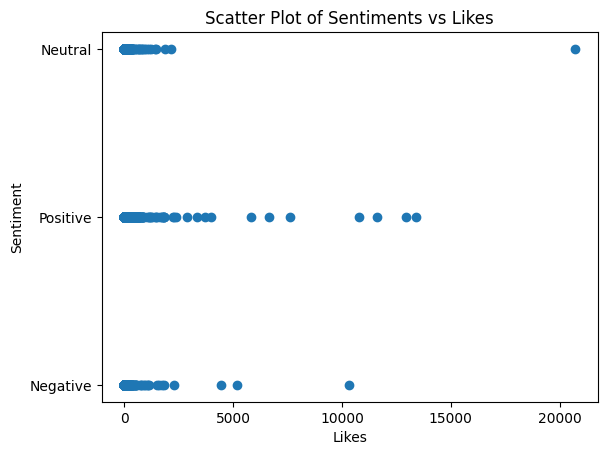

In [56]:
plt.scatter(sampled_df['Likes'], sampled_df['sentiment'])
plt.xlabel('Likes')
plt.ylabel('Sentiment')
plt.title('Scatter Plot of Sentiments vs Likes')
plt.show()

##Scatter plot of Sentiment vs Retweets

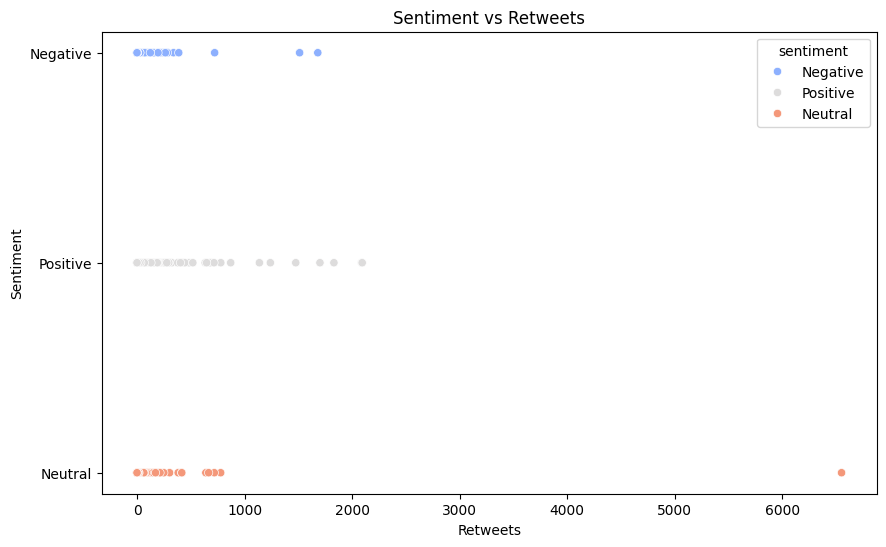

In [57]:
# Scatter plot of Sentiment vs Retweets
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='Retweets', y='sentiment', hue='sentiment', palette='coolwarm')
plt.title('Sentiment vs Retweets')
plt.xlabel('Retweets')
plt.ylabel('Sentiment')
plt.show()


##ii- Histogram of Sentiment Scores

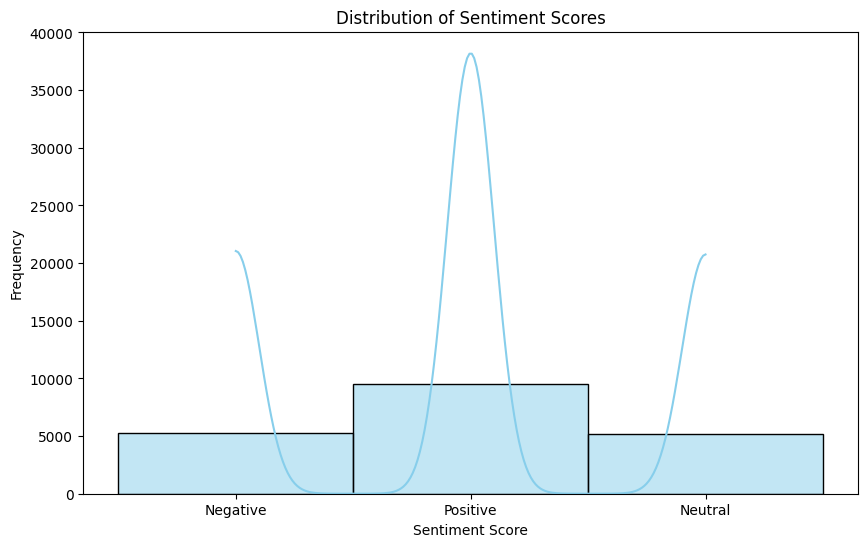

In [58]:
# Histogram of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=sampled_df, x='sentiment', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

##iii- Wordcloud

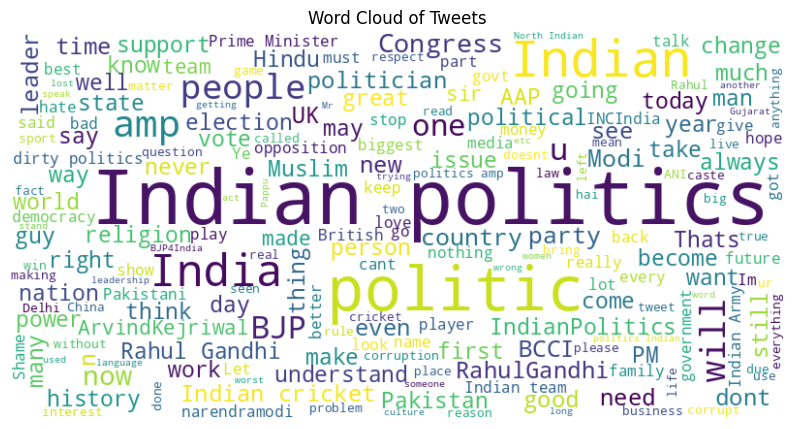

In [59]:
from wordcloud import WordCloud
# Combine all processed tweets into a single string
#Instead of using 'processed_tweet', use 'tokens' column which contains the processed tweets
all_words = ' '.join([' '.join(tweet) for tweet in sampled_df['tokens']])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

##iv- Pairplot

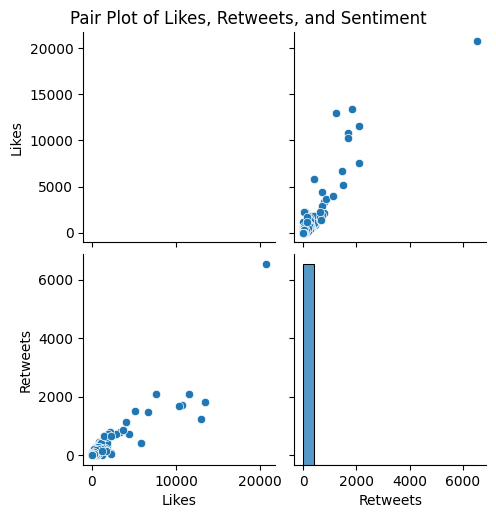

In [60]:
# Pair plot to visualize relationships between variables
sns.pairplot(sampled_df[['Likes', 'Retweets', 'sentiment']])
plt.suptitle('Pair Plot of Likes, Retweets, and Sentiment', y=1.02)
plt.show()


##v- Heatmap to show correlations

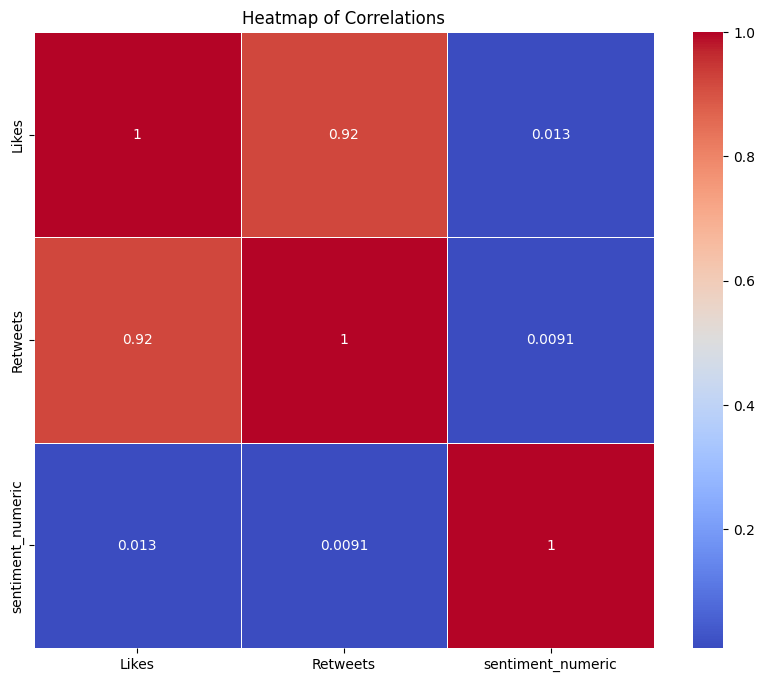

In [61]:
# Heatmap to show correlations
plt.figure(figsize=(10, 8))
# Convert 'sentiment' to numerical representation using pd.factorize or other methods
# Here, we map 'Negative' to 0, 'Neutral' to 1, and 'Positive' to 2
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
sampled_df['sentiment_numeric'] = sampled_df['sentiment'].map(sentiment_mapping)

# Calculate correlation matrix using the numerical representation of 'sentiment'
correlation_matrix = sampled_df[['Likes', 'Retweets', 'sentiment_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

##vi- Pie Chart Distribution of Sentiments

In [62]:
sentiment_counts = sampled_df['sentiment'].value_counts()

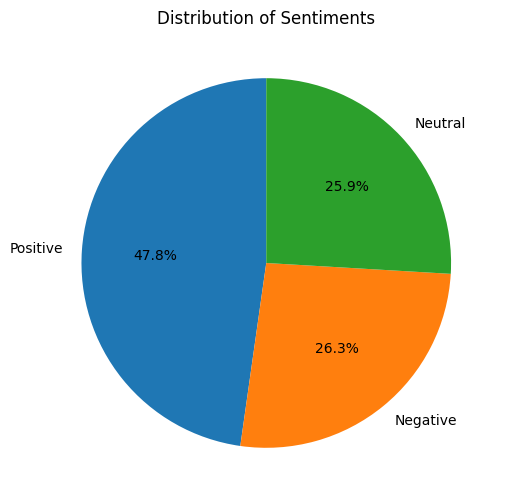

In [63]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

##vii- Bar Chart

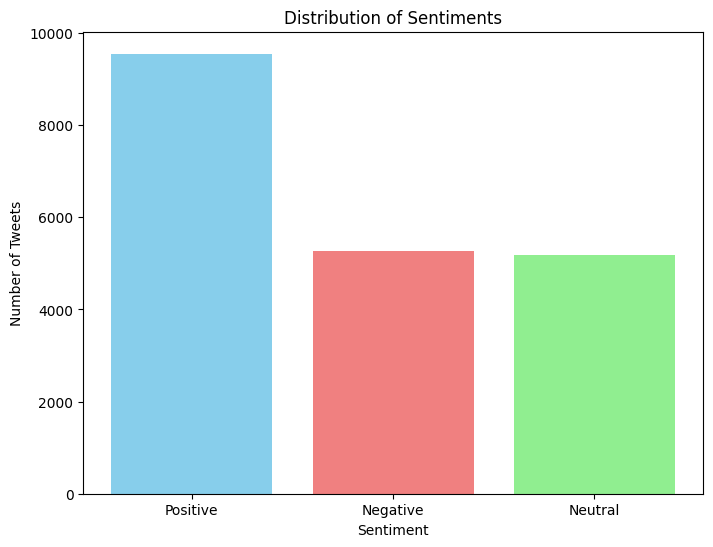

In [67]:
sentiment_counts = sampled_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
# Define colors for each sentiment category
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

#Results and Discussions

#Conclussions